In [355]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from book_registry import books
from nltk.tokenize import sent_tokenize

df = pd.read_feather("../data/preprocessing/book-5_pypdf_chapters.feather")
df

,chapter,content,book
0,1,This year we have taken the formations of the ...,book-5
1,2,Let us take up our account at the point we lef...,book-5
2,3,We have approached our task then by way of the...,book-5
3,4,We left things the last day at the point at wh...,book-5
4,5,When he gets to the synthetic part of his book...,book-5
5,6,Today I have some very important things to say...,book-5
6,7,The last day I spoke to you about the Grail. I...,book-5
7,8,I have the impression that last trimester - I ...,book-5
8,9,I announced that I would speak to you today ab...,book-5
9,10,We are going to continue our examination of wh...,book-5


In [356]:
df["content"] = df["content"].apply(lambda x: sent_tokenize(x))
df["content"]

0     [This year we have taken the formations of the...
1     [Let us take up our account at the point we le...
2     [We have approached our task then by way of th...
3     [We left things the last day at the point at w...
4     [When he gets to the synthetic part of his boo...
5     [Today I have some very important things to sa...
6     [The last day I spoke to you about the Grail.,...
7     [I have the impression that last trimester - I...
8     [I announced that I would speak to you today a...
9     [We are going to continue our examination of w...
10    [I am talking to you about the paternal metaph...
11    [Everybody is preoccupied by symbolization., A...
12    [References: Ernest Jones "The Phallic Phase" ...
13    [My dear friends, To take up again our discour...
14    [You know that what we are trying to do here, ...
15    [I would like today to begin to introduce the ...
16    [I am writing this on the board at the beginni...
17    [If the human affairs that we in principle

In [357]:
df = df.explode("content")

In [358]:
df.reset_index(inplace=True, drop=True)
df

,chapter,content,book
0,1,This year we have taken the formations of the ...,book-5
1,1,Those of you - I think it was the majority - w...,book-5
2,1,A certain number of you - I am only expressing...,book-5
3,1,Those who have had the courage to do so will b...,book-5
4,1,In a way it is a modest enough ambition for me...,book-5
...,...,...,...
5869,28,This all the same is one of the most surprisin...,book-5
5870,28,I think that in fact these objections which ar...,book-5
5871,28,"In fact, I believe that if something allows us...",book-5
5872,28,It is at this level that the Christian command...,book-5


### Fix short sentences

Concat them to the previous one


In [359]:
def replace_short_sentences(df: pd.DataFrame, max_length: int) -> pd.DataFrame:
    mask_s = df["content"].str.len() < max_length
    modifications = 0
    modified_rows = []
    for i in range(len(df)):
        if mask_s[i] and i > 0:
            # Concatenate short sentence to the previous sentence
            modified_rows[-1]["content"] += " " + df.at[i, "content"]
            modifications += 1
        else:
            # Append the row (modified or not) to the list
            modified_rows.append(df.iloc[i].to_dict())

    print(f"Modified {modifications} sentences from the total of {len(df)}.")
    return pd.DataFrame(modified_rows)

In [360]:
df.iloc[43:47]

,chapter,content,book
43,1,He comes as it were to sound things out in the...,book-5
44,1,This has overtones of a certain attempt at sed...,book-5
45,1,You have to admire it as something extraordinary.,book-5
46,1,It is true of course that the reverential fash...,book-5


In [361]:
df = replace_short_sentences(df=df, max_length=120)

Modified 2114 sentences from the total of 5874.


In [362]:
df.iloc[37:39]

,chapter,content,book
37,1,It was in this connection that I constructed t...,book-5
38,1,So that we are able to grasp at least somethin...,book-5


In [363]:
df = replace_short_sentences(df=df, max_length=88)

Modified 0 sentences from the total of 3760.


In [364]:
df.iloc[37]["content"]

'It was in this connection that I constructed the images of the technique of the upholsterer, of the buttoning point, since it is necessary that some point of the fabric of one should attach itself to the fabric of the other.'

In [365]:
df

,chapter,content,book
0,1,This year we have taken the formations of the ...,book-5
1,1,Those of you - I think it was the majority - w...,book-5
2,1,A certain number of you - I am only expressing...,book-5
3,1,Those who have had the courage to do so will b...,book-5
4,1,In a way it is a modest enough ambition for me...,book-5
...,...,...,...
3755,28,Experience proves that we have the most contra...,book-5
3756,28,I think that in fact these objections which ar...,book-5
3757,28,"In fact, I believe that if something allows us...",book-5
3758,28,It is at this level that the Christian command...,book-5


In [366]:
df = df.reset_index().rename(columns={"index": "sentence"})
df

,sentence,chapter,content,book
0,0,1,This year we have taken the formations of the ...,book-5
1,1,1,Those of you - I think it was the majority - w...,book-5
2,2,1,A certain number of you - I am only expressing...,book-5
3,3,1,Those who have had the courage to do so will b...,book-5
4,4,1,In a way it is a modest enough ambition for me...,book-5
...,...,...,...,...
3755,3755,28,Experience proves that we have the most contra...,book-5
3756,3756,28,I think that in fact these objections which ar...,book-5
3757,3757,28,"In fact, I believe that if something allows us...",book-5
3758,3758,28,It is at this level that the Christian command...,book-5


In [367]:
df["sentence_chapter"] = df.groupby("chapter").cumcount() + 1
df.iloc[135:140]

,sentence,chapter,content,book,sentence_chapter
135,135,1,This certainly contributes a good deal to our ...,book-5,136
136,136,1,"What is in question, is what it is that expres...",book-5,137
137,137,1,I am certainly leaving you on a note of suspen...,book-5,138
138,138,2,Let us take up our account at the point we lef...,book-5,1
139,139,2,"This then is where we will recommence, and it ...",book-5,2


In [368]:
df["sentence"] = df["sentence"] + 1
df.head()

,sentence,chapter,content,book,sentence_chapter
0,1,1,This year we have taken the formations of the ...,book-5,1
1,2,1,Those of you - I think it was the majority - w...,book-5,2
2,3,1,A certain number of you - I am only expressing...,book-5,3
3,4,1,Those who have had the courage to do so will b...,book-5,4
4,5,1,In a way it is a modest enough ambition for me...,book-5,5


In [369]:
cols = ["book", "sentence", "chapter", "sentence_chapter", "content"]
df = df[cols]
df

,book,sentence,chapter,sentence_chapter,content
0,book-5,1,1,1,This year we have taken the formations of the ...
1,book-5,2,1,2,Those of you - I think it was the majority - w...
2,book-5,3,1,3,A certain number of you - I am only expressing...
3,book-5,4,1,4,Those who have had the courage to do so will b...
4,book-5,5,1,5,In a way it is a modest enough ambition for me...
...,...,...,...,...,...
3755,book-5,3756,28,118,Experience proves that we have the most contra...
3756,book-5,3757,28,119,I think that in fact these objections which ar...
3757,book-5,3758,28,120,"In fact, I believe that if something allows us..."
3758,book-5,3759,28,121,It is at this level that the Christian command...


## Saving


In [370]:
# df.to_feather("../data/preprocessing/book-5_pypdf_sentences.feather")

## Graphs


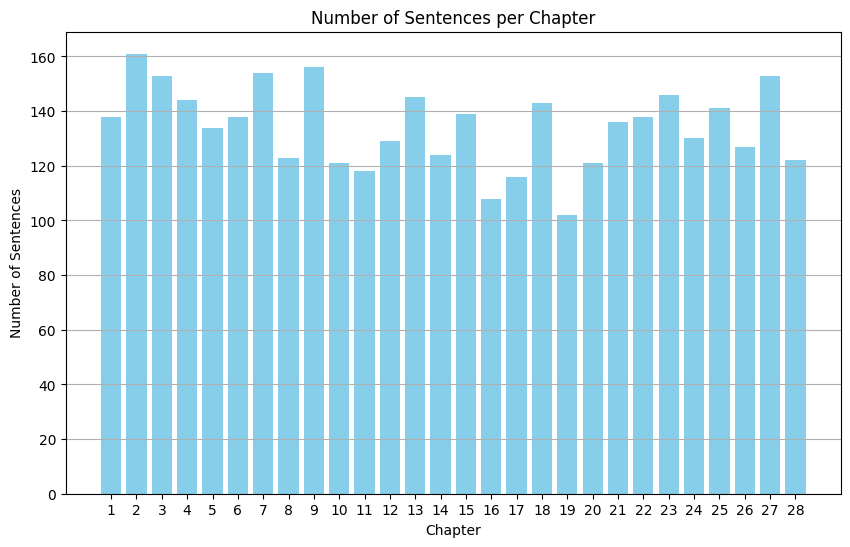

In [371]:
sentence_counts = df.groupby("chapter").size().reset_index(name="sentence_count")

plt.figure(figsize=(10, 6))
plt.bar(sentence_counts["chapter"], sentence_counts["sentence_count"], color="skyblue")
plt.xlabel("Chapter")
plt.ylabel("Number of Sentences")
plt.title("Number of Sentences per Chapter")
plt.xticks(sentence_counts["chapter"])
plt.grid(axis="y")

# Display the plot
plt.show()

In [376]:
char_counts = df["content"].apply(lambda x: len(x))
char_counts.sort_values()

0         89
3392     120
2976     120
1104     120
1521     120
        ... 
1029    1587
867     1703
2865    1708
3134    1830
1634    2285
Name: content, Length: 3760, dtype: int64

Impossible to understand these sentences on their own


In [377]:
df.iloc[0]["content"]

'This year we have taken the formations of the unconscious as the theme of our séminaire .'

In [379]:
df.iloc[3392]["content"]

'If the signs are valid for all, in principle this should give us a society which functions in a perfectly ideal fashion.'

In [380]:
df.iloc[2976]["content"]

'It is not a question of course of a real space, but it is a question of something in which homologues can be delineated.'

In [381]:
df.iloc[1104]["content"]

'This ceremony consisted in doing what was necessary, they probably knew it, to get the gods of the others on their side.'

In [382]:
df.iloc[1634]["content"]

'This little construction of schemas one upon the other, these little dancers standing astride, the legs of one on the shoulders of the other, this indeed is what we are dealing with, it is in so far as the third in this little scaffolding, namely the father in so far as he intervenes to prohibit, namely to make precisely what is the object of the mother\'s desire pass over to the properly symbolic status, namely that it is not only an imaginary object, but that it is also destroyed, prohibited, it is in so far as he intervenes as a real person, as "I" to perform this function, that this "I" will become something eminently signifying, and allow to be the kernel of the identification which is, when all is said and done, the last, supreme result of the   Oedipus complex which ensures that that it is to the father that there is referred the formation called the ego ideal, and these oppositions of the ego ideal compared to the object of the mother\'s desire are expressed on this schema in 